In [1]:
#import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#for feature scaling
from sklearn.preprocessing import MinMaxScaler

#split in train-test set
from sklearn.model_selection import train_test_split as split

#model evalutaion metrics
from sklearn import metrics

#for hyperparameters tuning
from sklearn.model_selection import RandomizedSearchCV

#for constructing distributions:
from scipy.stats import uniform
from scipy.stats import loguniform

import math

                                                             3rd Machine Learning Project - start2impact - Davide Miglietta

                                                        NOTEBOOK 2: Machine Learning Predictions and Models Comparation                                                     

# Student Alcohol Consumption

This is the last project of the data science path @start2impact. The dataset used can be found at: https://www.kaggle.com/uciml/student-alcohol-consumption

## Scope:

The scope of the analysis is to predict the finale grade G3 from the given attributes, on the Portuguese language course dataset. The EDA has been performed in a separate notebook.

## Context:
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students.

## Content:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

* **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* **sex** - student's sex (binary: 'F' - female or 'M' - male)
* **age** - student's age (numeric: from 15 to 22)
* **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
* **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
* **traveltime** - home to school travel time (numeric: 1 - 1 hour)
* **studytime** - weekly study time (numeric: 1 - 10 hours)
* **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
* **schoolsup** - extra educational support (binary: yes or no)
* **famsup** - family educational support (binary: yes or no)
* **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* **activities** - extra-curricular activities (binary: yes or no)
* **nursery** - attended nursery school (binary: yes or no)
* **higher** - wants to take higher education (binary: yes or no)
* **internet** - Internet access at home (binary: yes or no)
* **romantic** - with a romantic relationship (binary: yes or no)
* **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
* **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
* **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* **health** - current health status (numeric: from 1 - very bad to 5 - very good)
* **absences** - number of school absences (numeric: from 0 to 93)

### These grades are related with the course subject, Math or Portuguese:
* **G1** - first period grade (numeric: from 0 to 20)
* **G2** - second period grade (numeric: from 0 to 20)
* **G3** - final grade (numeric: from 0 to 20, output target)



## Table of contents:
1. [Data Manipulation](#1)
    - [Features and Target](#1.1)
    - [Train/Test Set Split](#1.2)


2. [Functions Definition for ML Analysis](#2)


3. [Machine Learning Models](#3)
    - [Simple Linear Regression](#3.1)
    - [Ridge Regression](#3.2)
    - [Lasso Regression](#3.3)
    - [K-NN Regression](#3.4)
    - [Decision Tree](#3.5)
    - [Random Forest](#3.6)
    - [Support Vector Regression](#3.7)
    

4. [Models Comparation](#4)
    - [Results Scatterplot](#4.1)
    - [Residuals Distributions](#4.2)
    - [Metrics Comparation](#4.3)


5. [Features Importance Evaluation](#5)

## 1

## Data Manipulation

In [2]:
#portuguese dataset import
df = pd.read_csv('student-por.csv')
print(df.shape)
df.head(2)

(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11


In [3]:
#splitting categorical variables to transform in numbers
categorical = df.select_dtypes(include=['object'])
cat_columns = categorical.columns.tolist()
print(cat_columns)

#one-hot encoding
categorical = pd.get_dummies(categorical)
categorical.head(2)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0


In [4]:
#from df drop the categorcal columns
df=df.drop(cat_columns, axis=1)
#and substitute with the one-hot encoded dataframe
df = pd.concat([df, categorical], axis = 1)
print(df.shape)

'''Finally, grades G1 and G2 have been removed from the dataset.
That's beacuse they are strictly correlated with the final grade G3 that we want to predict:
Basically, G3 is a "consequence" of G1 and G2. 

We suppose that in a real case, either or we don't have G1 and G2,
or if we have, we can simply use those two grades for a very simple linear regression.'''

df=df.drop(['G1', 'G2'], axis=1)
print(df.shape)

df.head(2)

(649, 59)
(649, 57)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0


### 1.1

### Features and Target

In [5]:
#as said, the target y is the fianl grade G3
y = df.pop('G3')

y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [6]:
#X is set as a copy of df
X = df.copy()
X.head(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0


### 1.2

### Train/Test Set Split

In [7]:
#setting same conditions for replicabilty: test_size =.2, random_state=0

X_train, X_test, y_train, y_test = split(X, y, test_size =.2, random_state=0) 

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print('****************')
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(649, 56)
(519, 56)
(130, 56)
****************
(649,)
(519,)
(130,)


In [8]:
#dataset scaling
scaler = MinMaxScaler()

#calculating mean and variance of every feature on the train set, then scaling it
X_train = scaler.fit_transform(X_train)
print(X_train)

#the calculated parameters are used to transform the test set
X_test = scaler.transform(X_test)
print(X_test)

[[0.14285714 0.75       0.5        ... 1.         1.         0.        ]
 [0.28571429 0.25       0.25       ... 1.         1.         0.        ]
 [0.42857143 0.75       0.5        ... 1.         0.         1.        ]
 ...
 [0.14285714 1.         0.5        ... 1.         0.         1.        ]
 [0.28571429 0.25       0.5        ... 1.         1.         0.        ]
 [0.42857143 0.25       0.         ... 0.         1.         0.        ]]
[[0.14285714 0.5        0.25       ... 1.         0.         1.        ]
 [0.28571429 0.         0.5        ... 1.         1.         0.        ]
 [0.42857143 0.75       1.         ... 1.         1.         0.        ]
 ...
 [0.42857143 0.5        0.5        ... 0.         1.         0.        ]
 [0.28571429 0.5        0.5        ... 0.         0.         1.        ]
 [0.42857143 0.5        0.25       ... 1.         0.         1.        ]]


## 2

## Functions Definition for ML Analysis

For the following part, two functions have been created in order to be re-used for all the models:
* **random_search():** applying randomized search to find the best hyperparameters
* **see_randomsearch_results():** visualize the obtained results

The first function uses RandomizedSearchCV() to randomly test ML models hyperparameters from a given interval (or combination). 

It differentiates from GridSearch() because GridSearch() tries all possible combinations for the given hyperparameters. So, it is very computationally expensive.

With RandomizedSearchCV() it is possible to set 'n_iter' that is the number of iterations to perform. RandomizedSearchCV() performs like GridSearch() or even better.

Some considerations:
* model and parameters are the model and the set of hyperparameters to be tested
* cv is the number of folds for cross-validation
* scoring is the metric that discriminates the parameters
* verbose is set to 50 to have a sense of the ongoing analysis
* a 'model_dict' is created to have all information organized in the same way for all the models

In [9]:
def random_search(model, parameters, k, scoring, N):
       
    rs = RandomizedSearchCV(model, parameters, cv = k, scoring = scoring, n_iter = N, verbose = 50, n_jobs = -1) 
    rs = rs.fit(X_train,y_train)
    
    #'model_dict' is a dictionary containing all results of RandomizedSearchCV() for an easier later consultation
    model_dict = {}
    model_dict['best_score'] = rs.best_score_
    model_dict['best_params'] = rs.best_params_
    
    model_dict['params'] = rs.cv_results_['params']
    model_dict['means'] = rs.cv_results_['mean_test_score']
    model_dict['stds'] = rs.cv_results_['std_test_score']
        
    model_dict['MAE_train'] = metrics.mean_absolute_error(y_train, rs.predict(X_train))
    model_dict['MSE_train'] = metrics.mean_squared_error(y_train, rs.predict(X_train))
    model_dict['RMSE_train'] = np.sqrt(metrics.mean_squared_error(y_train, rs.predict(X_train)))
    model_dict['r2_train'] = np.sqrt(metrics.r2_score(y_train, rs.predict(X_train)))
    
    model_dict['MAE_test'] = metrics.mean_absolute_error(y_test, rs.predict(X_test))
    model_dict['MSE_test'] = metrics.mean_squared_error(y_test, rs.predict(X_test))
    model_dict['RMSE_test'] = np.sqrt(metrics.mean_squared_error(y_test, rs.predict(X_test)))
    model_dict['r2_test'] = np.sqrt(metrics.r2_score(y_test, rs.predict(X_test)))
        
    best_model = rs.best_estimator_
    
    return best_model, model_dict

In [10]:
def see_randomsearch_results(x, model_dict, regr_model):
    
    print('Best Model:', regr_model)
    print('\nBest score ({}): {:.2f}'.format(scoring, model_dict['best_score']))
    
    #to organize in descending order the results of the RandomizedSearchCV()
    #and organize consequently the corresponding standard deviations and list of parameters
    
    means = list(model_dict['means'])
    stds = list(model_dict['stds'])
    params = list(model_dict['params'])
     
    sorted_lists = sorted(zip(means, stds, params), reverse = True, key = lambda l:l[0])
    tuples = zip(*sorted_lists)
    sorted_means, sorted_stds, sorted_params = [ list(tuple) for tuple in  tuples]
    
    plt.figure(figsize=(20, 4))
    
    #plot a point corresponding to the score and a bar corresponding to the std dev for each group of parameters
    plt.errorbar(np.arange(x), sorted_means[:x], yerr=sorted_stds[:x], fmt='o', ms=15,
                 ecolor='green', capsize=15, capthick=3)
    plt.xticks(np.arange(x))
    
    plt.show()

    print('Chart Legend:\n')
    
    for i in np.arange(x):
        print('{} --> Hyperparameters: {}'.format(i, sorted_params[i]))

### Functions parameters

In [11]:
print(metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [12]:
k = 5 #k-folds for cross validation

scoring = 'neg_mean_squared_error'  

N = 200 #number of iterations (combination of hyperparameters)


As discriminant, it has been choosed the Mean Squared Error since it has been noticed that for higher grades performances are not good. For those grades error is quite big; using Mean Squared Error we try to minimize bigger errors.

## 3

## Machine Learning Models

### 3.1

### Simple Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {} #with no parameters: it is basically a cross validation

LR_model, LR_dict = random_search(regressor, parameters, k, scoring, 1)

LR_predictions = LR_model.predict(X_test)

print('\nDone!')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished

Done!


Best Model: LinearRegression()

Best score (neg_mean_squared_error): -8.54


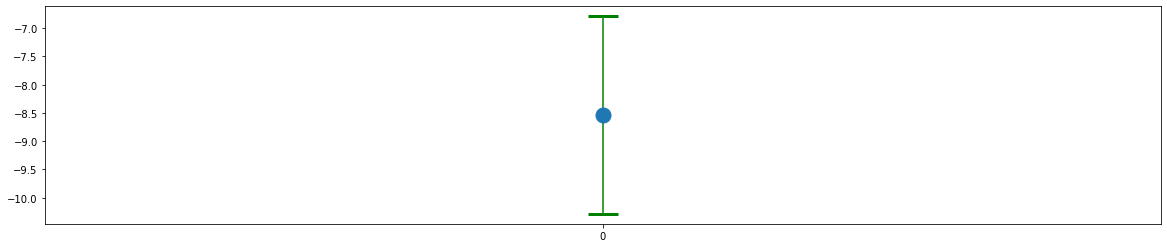

Chart Legend:

0 --> Hyperparameters: {}


In [14]:
see_randomsearch_results(1, LR_dict, LR_model)

### 3.2

### Ridge Regression

In general, linear regression looks for the line that results in the minimum sum of squared residuals. A residual is the difference between the true value and the corresponding prediction by the line.

**For Ridge and Lasso Regression:**

Both are linear regressions that add a term to the sum of squared residuals:
- Ridge: alpha * coefficient ^ 2
- Lasso: alpha * |coefficient|

**Ridge**: $\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

So, instead of minimizing only the sum of squared residuals, to find the best fit it minimize the sum + the term.  This term add a penalty to the least squares method. Alpha (or lambda, according to how is named) determines how severe the penalty is. 

Generally speaking, increasing the value of alpha (lambda): the obtained line will have a smaller slope and the prediction will be less sensitive to the indipendent variable(s).

They usually reduce the possibility of overfitting compared with simple linear regression. Because it introduce a small increase in bias and a significant drop in variance.

The main diference between Ridge and Lasso is that increasing alpha, in Lasso regression it will be reach a point in which the slope will go to zero. In ridge, it doesn't reach zero. Practically speaking in a multiple regression if a coefficient of an indipendent variable (a1, a2, ... in: a1*x1 + a2*x2 + .... = y) reaches zero, than that specific variable doesn't give contribute in the prediction anymore.

In [15]:
from sklearn.linear_model import Ridge

regressor = Ridge() 
parameters = {'alpha' : loguniform(1e-3, 1e3)}

ridge_model, ridge_dict = random_search(regressor, parameters, k, scoring, N)

ridge_predictions = ridge_model.predict(X_test)

print('\nDone!')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0319s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0499s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_

Best Model: Ridge(alpha=20.33833127443848)

Best score (neg_mean_squared_error): -8.38


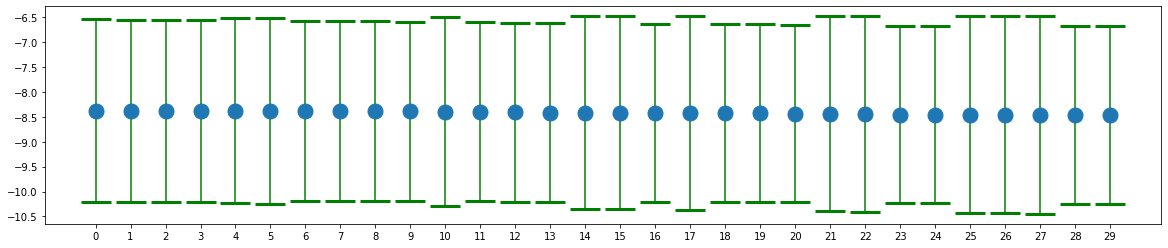

Chart Legend:

0 --> Hyperparameters: {'alpha': 20.33833127443848}
1 --> Hyperparameters: {'alpha': 17.46021840484506}
2 --> Hyperparameters: {'alpha': 17.275440746572546}
3 --> Hyperparameters: {'alpha': 17.158513869913655}
4 --> Hyperparameters: {'alpha': 24.339419291052447}
5 --> Hyperparameters: {'alpha': 26.561840477332645}
6 --> Hyperparameters: {'alpha': 13.95410196314359}
7 --> Hyperparameters: {'alpha': 12.795771743493754}
8 --> Hyperparameters: {'alpha': 12.394433150493574}
9 --> Hyperparameters: {'alpha': 11.983994355572497}
10 --> Hyperparameters: {'alpha': 32.36293344317189}
11 --> Hyperparameters: {'alpha': 11.404705972598357}
12 --> Hyperparameters: {'alpha': 9.367021191602703}
13 --> Hyperparameters: {'alpha': 8.506930871677055}
14 --> Hyperparameters: {'alpha': 39.84913885471332}
15 --> Hyperparameters: {'alpha': 40.29780473601402}
16 --> Hyperparameters: {'alpha': 7.912583949691002}
17 --> Hyperparameters: {'alpha': 42.62191318015469}
18 --> Hyperparameters: {'alpha':

In [16]:
see_randomsearch_results(30, ridge_dict, ridge_model)

### 3.3

### Lasso Regression

In [17]:
from sklearn.linear_model import Lasso

regressor = Lasso() 
parameters = {'alpha' : loguniform(1e-3, 1e3)}

lasso_model, lasso_dict = random_search(regressor, parameters, k, scoring, N)

lasso_predictions = lasso_model.predict(X_test)

print('\nDone!')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0189s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0289s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_

Best Model: Lasso(alpha=0.039395757257605996)

Best score (neg_mean_squared_error): -8.35


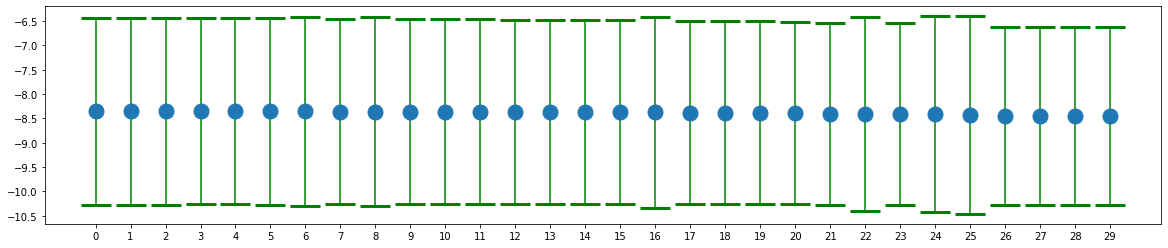

Chart Legend:

0 --> Hyperparameters: {'alpha': 0.039395757257605996}
1 --> Hyperparameters: {'alpha': 0.039735692222515134}
2 --> Hyperparameters: {'alpha': 0.03857304457851175}
3 --> Hyperparameters: {'alpha': 0.03846254119632042}
4 --> Hyperparameters: {'alpha': 0.03769791812864259}
5 --> Hyperparameters: {'alpha': 0.04299295091713402}
6 --> Hyperparameters: {'alpha': 0.045919580876757723}
7 --> Hyperparameters: {'alpha': 0.032501282306258775}
8 --> Hyperparameters: {'alpha': 0.0478513864142711}
9 --> Hyperparameters: {'alpha': 0.03143321539174133}
10 --> Hyperparameters: {'alpha': 0.03127409411054193}
11 --> Hyperparameters: {'alpha': 0.030511523631396215}
12 --> Hyperparameters: {'alpha': 0.030411387339802854}
13 --> Hyperparameters: {'alpha': 0.028823812958361457}
14 --> Hyperparameters: {'alpha': 0.02845009574079993}
15 --> Hyperparameters: {'alpha': 0.02747991542515589}
16 --> Hyperparameters: {'alpha': 0.0556688033713128}
17 --> Hyperparameters: {'alpha': 0.024706023783051555}

In [18]:
see_randomsearch_results(30, lasso_dict, lasso_model)

Alpha is almost zero, meaning that we basically got a simple linear regression.

Both Lasso and Ridge regression are not improving performances compared to simple linear regression.

### 3.4

### K-NN Regression

The hyperparameter to validate is the number of neighbors K. It is the number of samples which will be compared to the sample to predict. In classification, the most represented class in the K-neighbors will be assigned to the sample to predict. In regression (the actual case), average is computed between the K-neighbors and then assigned.

In [19]:
#round(X.shape[0] * 0.05)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

Kmin = round(X.shape[0] * 0.005)
Kmax = round(X.shape[0] * 0.1)
Ks= Kmax-Kmin

parameters = {'n_neighbors': np.arange(Kmin,Kmax)}

KNN_model, KNN_dict = random_search(regressor, parameters, k, scoring, Ks)

KNN_predictions = KNN_model.predict(X_test)

print('\nDone!')

Fitting 5 folds for each of 62 candidates, totalling 310 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0838s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0708s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jo

Best Model: KNeighborsRegressor(n_neighbors=17)

Best score (neg_mean_squared_error): -9.18


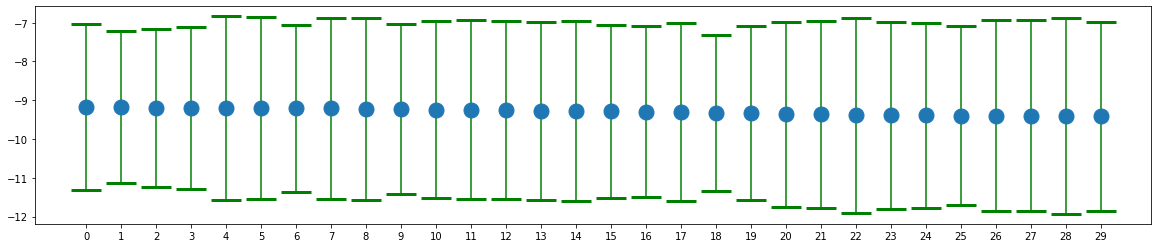

Chart Legend:

0 --> Hyperparameters: {'n_neighbors': 17}
1 --> Hyperparameters: {'n_neighbors': 14}
2 --> Hyperparameters: {'n_neighbors': 15}
3 --> Hyperparameters: {'n_neighbors': 16}
4 --> Hyperparameters: {'n_neighbors': 25}
5 --> Hyperparameters: {'n_neighbors': 24}
6 --> Hyperparameters: {'n_neighbors': 18}
7 --> Hyperparameters: {'n_neighbors': 23}
8 --> Hyperparameters: {'n_neighbors': 26}
9 --> Hyperparameters: {'n_neighbors': 19}
10 --> Hyperparameters: {'n_neighbors': 20}
11 --> Hyperparameters: {'n_neighbors': 27}
12 --> Hyperparameters: {'n_neighbors': 29}
13 --> Hyperparameters: {'n_neighbors': 22}
14 --> Hyperparameters: {'n_neighbors': 28}
15 --> Hyperparameters: {'n_neighbors': 30}
16 --> Hyperparameters: {'n_neighbors': 31}
17 --> Hyperparameters: {'n_neighbors': 21}
18 --> Hyperparameters: {'n_neighbors': 13}
19 --> Hyperparameters: {'n_neighbors': 32}
20 --> Hyperparameters: {'n_neighbors': 39}
21 --> Hyperparameters: {'n_neighbors': 40}
22 --> Hyperparameters: {'n

In [21]:
see_randomsearch_results(30, KNN_dict, KNN_model)

### 3.5

### Decision Tree

Hyperparameters: 

- **max depth:** maximum depth of the tree
- **min_samples_leaf:** minimum numbers of samples in a leaf (if float --> fraction of samples)
- **min_samples_split:** minimum number of samples required to split an internal node (if float --> fraction of samples)

In [22]:
#math.ceil(X.shape[0] * 0.003) 
#math.ceil(X.shape[0] * 0.25)

In [23]:
from sklearn.tree import DecisionTreeRegressor 


regressor = DecisionTreeRegressor()

parameters = {'max_depth': [2, 5, 10, 20, 50, None],
              'min_samples_leaf': loguniform(0.001,0.25), 
             'min_samples_split': loguniform(0.003,0.25) 
             }

    
DT_model, DT_dict = random_search(regressor, parameters, k, scoring, N)

DT_predictions = DT_model.predict(X_test)

print('\nDone!')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0319s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0199s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_

Best Model: DecisionTreeRegressor(max_depth=50, min_samples_leaf=0.05048270236955547,
                      min_samples_split=0.03020692212025425)

Best score (neg_mean_squared_error): -8.11


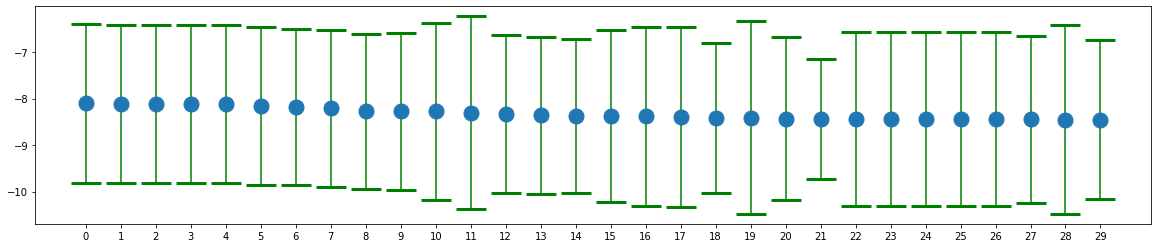

Chart Legend:

0 --> Hyperparameters: {'max_depth': 50, 'min_samples_leaf': 0.05048270236955547, 'min_samples_split': 0.03020692212025425}
1 --> Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 0.04983666533329596, 'min_samples_split': 0.030751398702613546}
2 --> Hyperparameters: {'max_depth': None, 'min_samples_leaf': 0.04852320803015954, 'min_samples_split': 0.01978220687603231}
3 --> Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 0.05016263721811084, 'min_samples_split': 0.022737192740387754}
4 --> Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 0.04893489615257724, 'min_samples_split': 0.05114861549945905}
5 --> Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 0.052499611637701504, 'min_samples_split': 0.007807804470325171}
6 --> Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 0.03891923022664499, 'min_samples_split': 0.14965574169312867}
7 --> Hyperparameters: {'max_depth': 50, 'min_samples_leaf': 0.041026598883090466, 'min_samples_split': 0.04285

In [24]:
see_randomsearch_results(30, DT_dict, DT_model)

### 3.6

### Random Forest

Hyperparameters: 

- **n_estimators:** Number of single trees in the random forest. Ideally, the higher the better. However, above a certain threshold improvement is not significant anymore, while computational time increases. So it's important to find the right compromise.
- **max features:** numbers of features considered for splitting. This is the most important hyperparameter for a random forest. The single trees could present high variance but, since in each tree we are -randomly- not considering all the features and we are combining many different trees, the result is a sensible decrease in variance (overfitting) but only a small increase in bias (underfitting).

- **min_samples_leaf, min_samples_split and max depth** can be also validated

In [25]:
math.ceil(X.shape[0] * 0.003)
#math.ceil(X.shape[0] * 0.01)

2

In [26]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor(random_state=0)


parameters = {'n_estimators': [100, 500],
              'max_features':np.arange(1,int(df.shape[1]/2)),
             'min_samples_split': loguniform(0.03,0.25),
             #'min_samples_leaf':loguniform(0.003,0.25)
             }


RF_model, RF_dict = random_search(regressor, parameters, k, scoring, N)

RF_predictions = RF_model.predict(X_test)

print('\nDone!')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   40.5s
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.4min
[Paralle

[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:  2.2min
[Paralle

[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:  3.0min
[Paralle

[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 681 tasks      | elapsed:  3.9min
[Paralle

[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 813 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 815 tasks      | elapsed:  4.6min
[Paralle

[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 934 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 935 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 939 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:  5.4min
[Paralle

Best Model: RandomForestRegressor(max_features=14, min_samples_split=0.03810217346454353,
                      random_state=0)

Best score (neg_mean_squared_error): -7.48


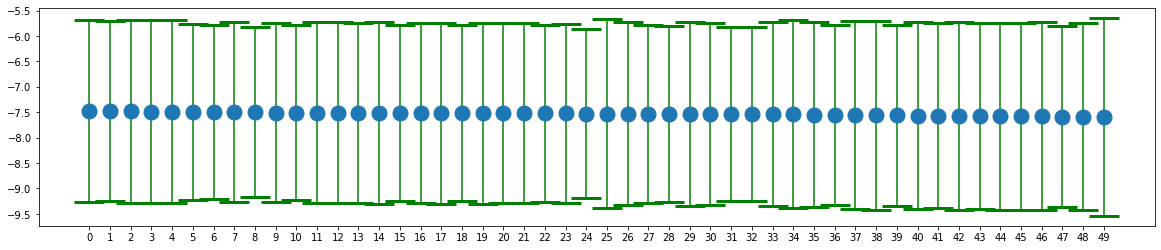

Chart Legend:

0 --> Hyperparameters: {'max_features': 14, 'min_samples_split': 0.03810217346454353, 'n_estimators': 100}
1 --> Hyperparameters: {'max_features': 20, 'min_samples_split': 0.04207093793670778, 'n_estimators': 500}
2 --> Hyperparameters: {'max_features': 16, 'min_samples_split': 0.032172378523435, 'n_estimators': 500}
3 --> Hyperparameters: {'max_features': 14, 'min_samples_split': 0.035490002197927015, 'n_estimators': 100}
4 --> Hyperparameters: {'max_features': 14, 'min_samples_split': 0.034012518371444006, 'n_estimators': 500}
5 --> Hyperparameters: {'max_features': 26, 'min_samples_split': 0.035049842288477843, 'n_estimators': 500}
6 --> Hyperparameters: {'max_features': 18, 'min_samples_split': 0.03175304764917954, 'n_estimators': 500}
7 --> Hyperparameters: {'max_features': 22, 'min_samples_split': 0.041610660322166544, 'n_estimators': 500}
8 --> Hyperparameters: {'max_features': 24, 'min_samples_split': 0.0450725902846797, 'n_estimators': 100}
9 --> Hyperparameters

In [27]:
see_randomsearch_results(50, RF_dict, RF_model)

### 3.7

### Support Vector Regression

Hyperparameters: 

- **kernel:** type of transformation

- **epsilon:** it's the distance from the hyperplane (epsilon-tube) within no penalty is associated in the training loss function for points predicted in the epsilon tube.

- **degree:** (only for polynomial) poly degree

- **C:** *'The C parameter trades off correct classification of training examples against maximization of the decision function's margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.'*

* **gamma:** *'Defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'.'*

In [28]:
from sklearn.svm import SVR

regressor = SVR()

C_range = loguniform(1e-3, 1e3)
gamma_range = loguniform(1e-4, 1e3)
degree_range = np.arange(2,5)
epsilon_range = loguniform(1e-3, 1e4)

parameters = [
                {'kernel' : ['linear'], 'C' : C_range, 'epsilon': epsilon_range},
                {'kernel' : ['rbf'], 'C' : C_range, 'gamma' : gamma_range, 'epsilon': epsilon_range},
                {'kernel' : ['poly'], 'C' : C_range, 'degree' : degree_range, 'epsilon': epsilon_range}
                
             ]


SVR_model, SVR_dict = random_search(regressor, parameters, k, scoring, N)

SVR_predictions = SVR_model.predict(X_test)

print('\nDone!')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 424 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 436 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 452 tasks      | elapsed:   13.5s
[Paralle

[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.5921s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 882 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 886 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 887 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0758s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 889 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 890 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 891 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 

Best Model: SVR(C=79.01932522455066, epsilon=0.7316732286917665, gamma=0.009329467427928548)

Best score (neg_mean_squared_error): -8.13


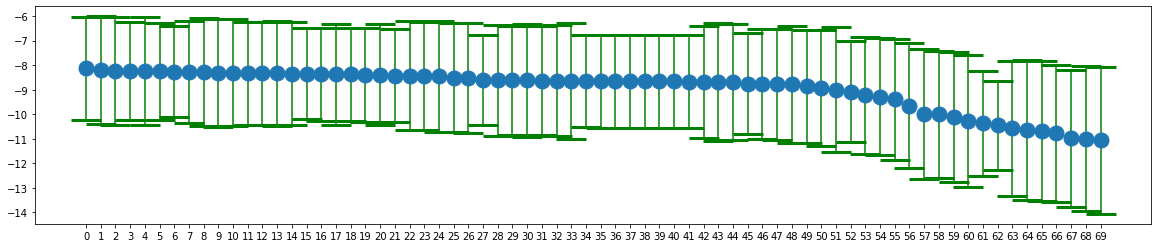

Chart Legend:

0 --> Hyperparameters: {'C': 79.01932522455066, 'epsilon': 0.7316732286917665, 'gamma': 0.009329467427928548, 'kernel': 'rbf'}
1 --> Hyperparameters: {'C': 0.42663484940541346, 'degree': 2, 'epsilon': 0.00443653783424939, 'kernel': 'poly'}
2 --> Hyperparameters: {'C': 0.45584972148066755, 'degree': 3, 'epsilon': 0.05081547793557998, 'kernel': 'poly'}
3 --> Hyperparameters: {'C': 0.18125391488633913, 'epsilon': 0.9573400042796628, 'kernel': 'linear'}
4 --> Hyperparameters: {'C': 0.3592606213923828, 'degree': 2, 'epsilon': 0.0016728049462352023, 'kernel': 'poly'}
5 --> Hyperparameters: {'C': 4.094286623846161, 'epsilon': 1.3124202761310861, 'kernel': 'linear'}
6 --> Hyperparameters: {'C': 7.759782847565464, 'epsilon': 0.5991485890195454, 'kernel': 'linear'}
7 --> Hyperparameters: {'C': 0.1833583970580008, 'epsilon': 0.30325009828446237, 'kernel': 'linear'}
8 --> Hyperparameters: {'C': 0.330450327212605, 'degree': 2, 'epsilon': 0.001030103633370428, 'kernel': 'poly'}
9 --> 

In [29]:
see_randomsearch_results(70, SVR_dict, SVR_model)

### 4

### Models Comparation

In this section the results obtained will be compared in order to find the model with the best performance.

In [30]:
#the following lists are creating for an easier iteration of the following part

#those three lists should be of the same length and contains model information in the same order
#then all the rest is 'automatically' arranged
models = ['Linear Regression', 'Ridge', 'Lasso', 'K-NN', 'Decision Tree', 'Random Forest', 'SVR']
dicts = [LR_dict, ridge_dict, lasso_dict, KNN_dict, DT_dict, RF_dict, SVR_dict]
regr_predictions = [LR_predictions, ridge_predictions, lasso_predictions, KNN_predictions, DT_predictions, RF_predictions, SVR_predictions]

name_metrics = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'r2' ]
train_metrics = ['MAE_train', 'MSE_train', 'RMSE_train', 'r2_train']
test_metrics = ['MAE_test', 'MSE_test', 'RMSE_test', 'r2_test']

tableu_colors = list(mcolors.TABLEAU_COLORS.keys())


### 4.1

### Results scatterplots

On the left side:
- the graph shows the comparation between predicted values and real ones. Ideally the scatter plot should be close to the line y = x (perfect predictions)

On the right side:
- the graph shows the scatter plot of the residuals (predictions - real values) compared with the predictions. Ideally residuals are close to the line y = 0. In general, a good model has residuals with a normal distribution centered in zero (the more narrow the distribution, the better).

*Note that also for the next part the models will be plot with the same color for easier comparation*

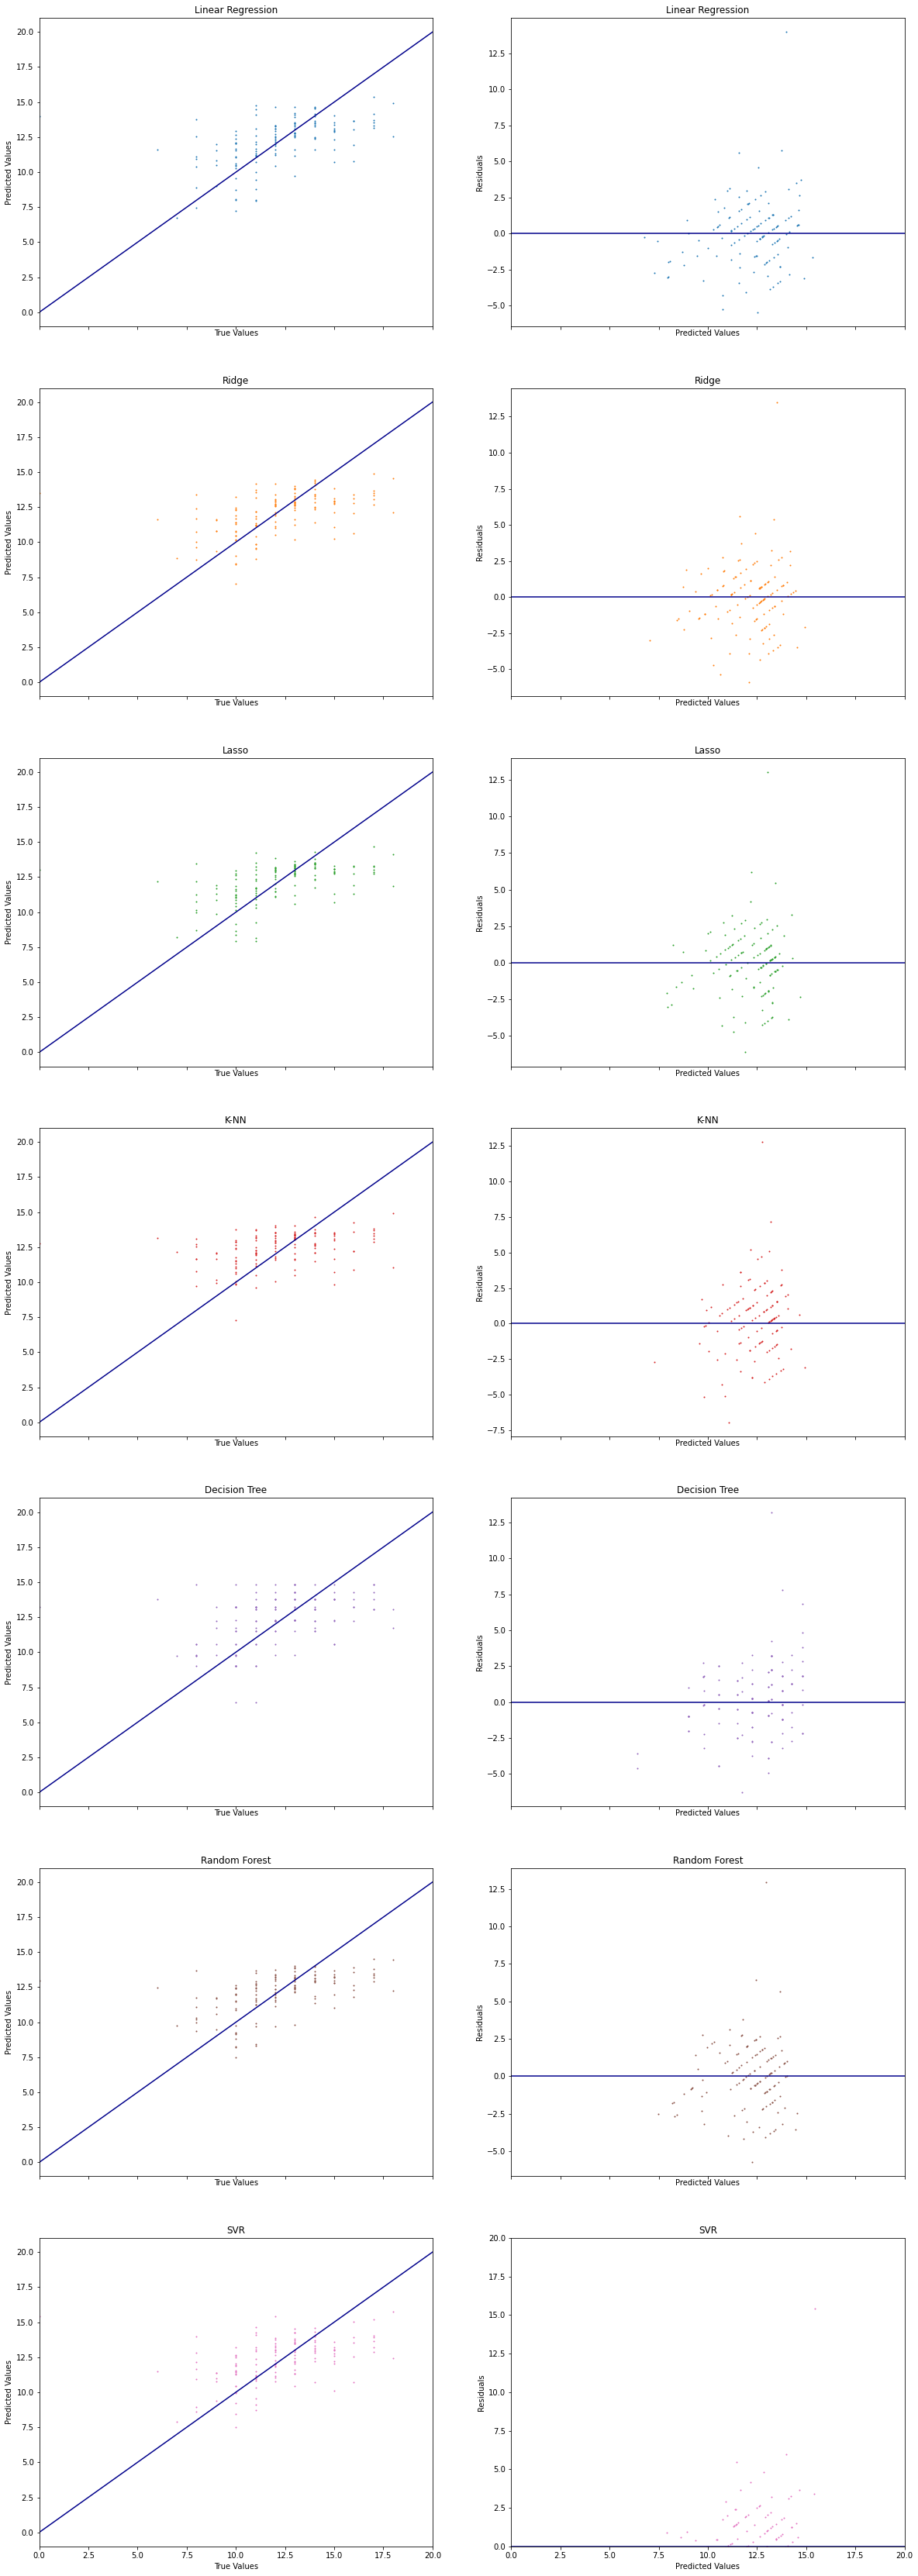

In [31]:
i = 0

fig, axes = plt.subplots(nrows = len(regr_predictions), ncols = 2, sharex = True, figsize = (20,60))

for pred, ax, color in zip(regr_predictions, axes, tableu_colors):
    
    ax1 = ax[0]
    ax1.scatter(y_test, regr_predictions[i], s=1, c = color)
    ax1.plot([0, 20], [0, 20], color='darkblue')
    
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predicted Values')
    ax1.set_title(models[i])
    
    residuals = pred - y_test
    
    ax2 = ax[1]
    ax2.scatter(pred, residuals, s=1, c = color)
    ax2.axhline(color='darkblue')

    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Residuals')
    ax2.set_title(models[i])
    i = i + 1

plt.xlim([0,20])
plt.ylim([0,20])
plt.show()

Predictions are concetrated in the interval 10-15 and follow only partially the blue oblique line. For better consderations, see the following part.


### 4.2

### Residuals Distributions

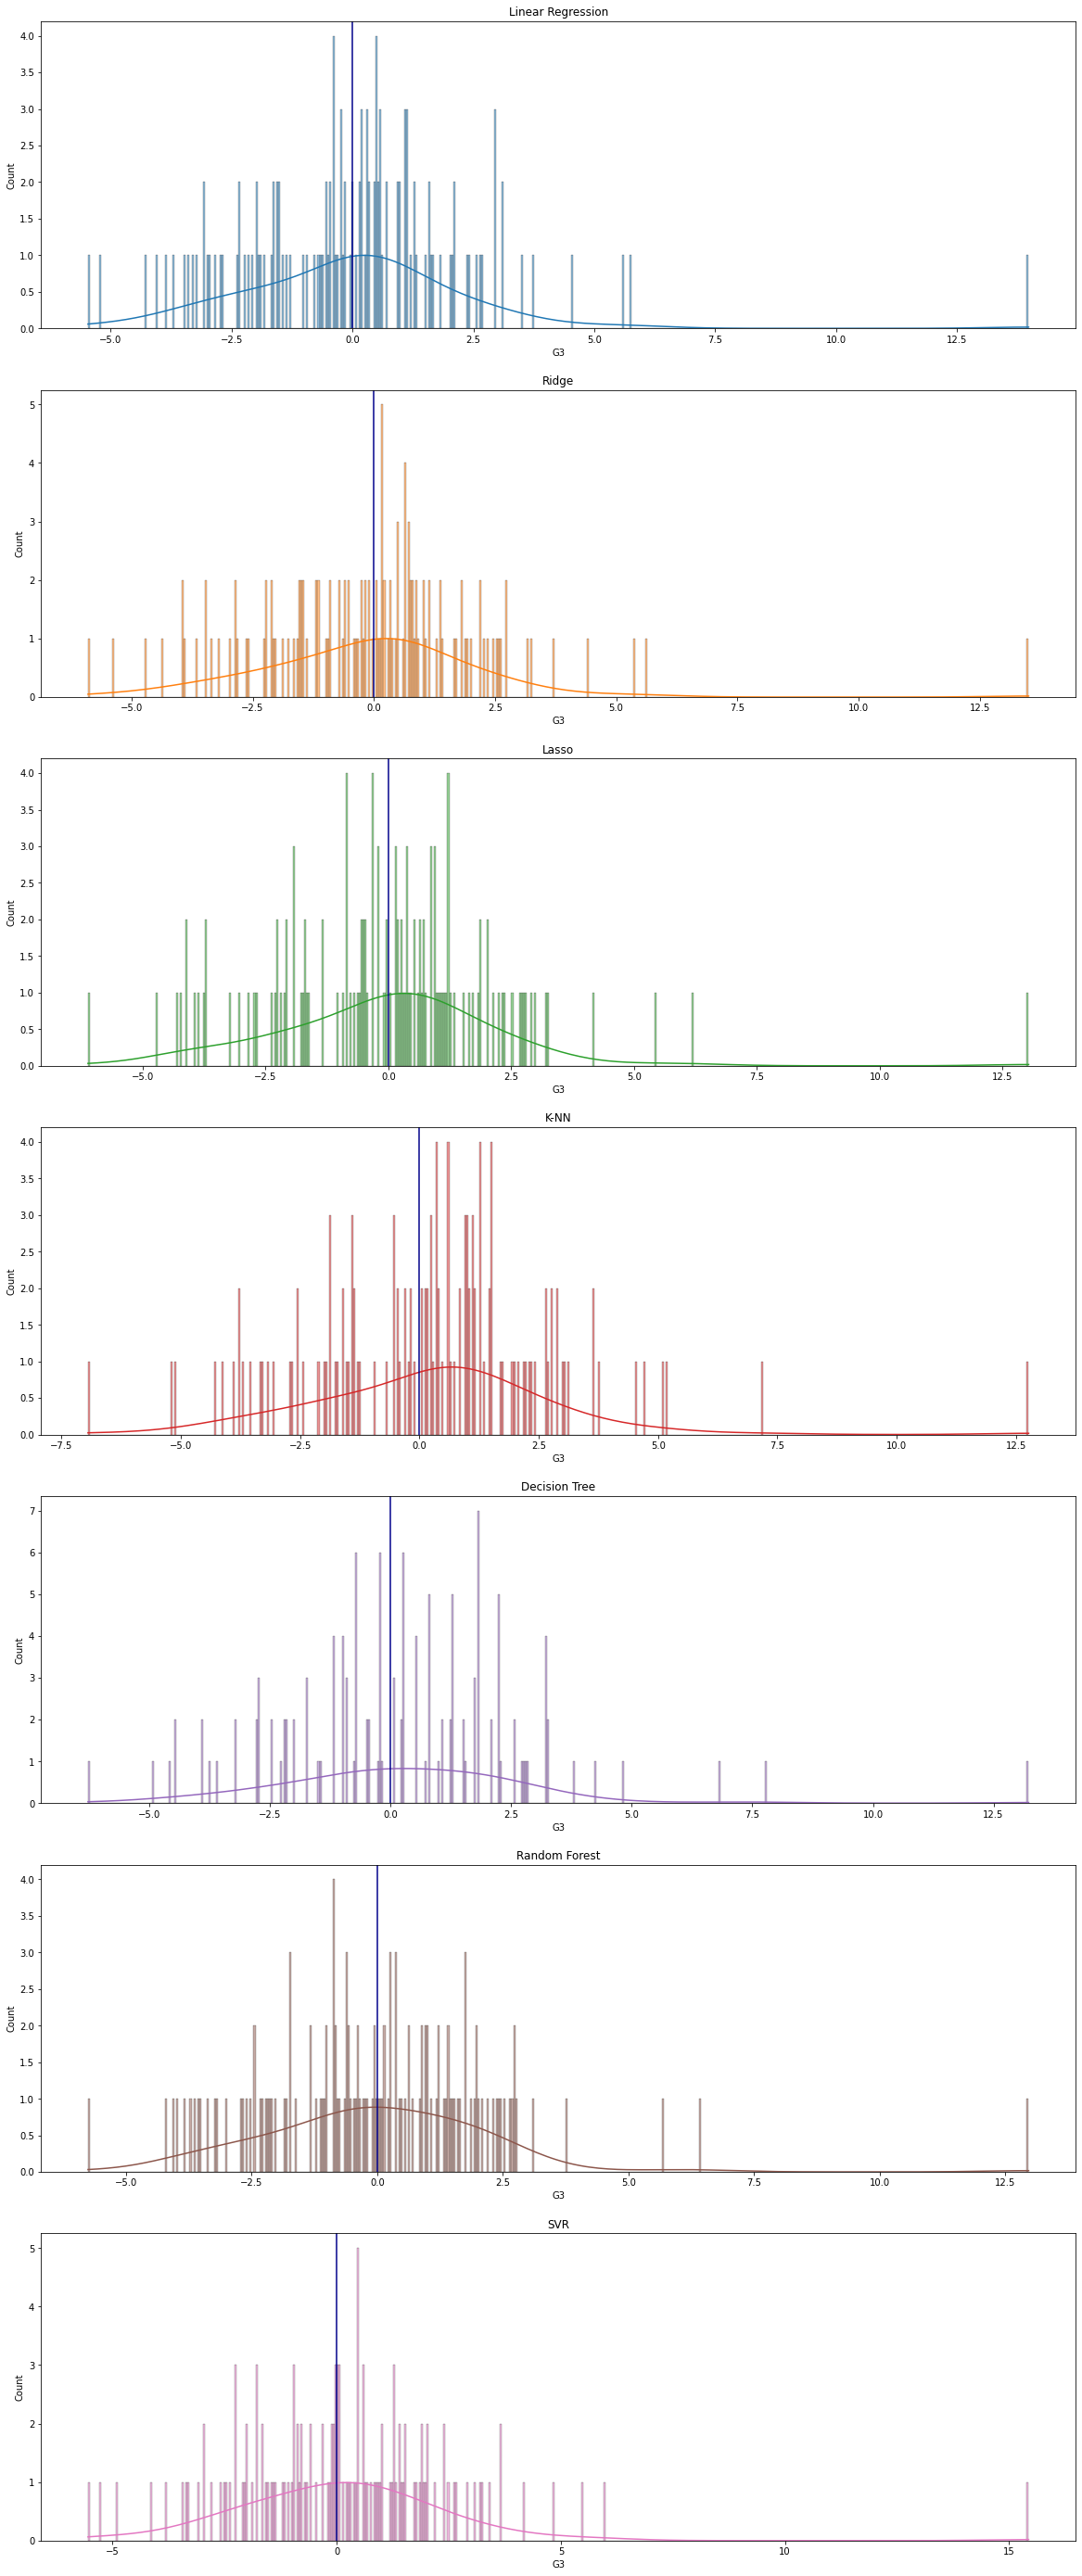

In [32]:
i = 0

fig, axes = plt.subplots(nrows = len(regr_predictions), ncols = 1, figsize = (20,50))

for pred, ax, color in zip(regr_predictions, axes, tableu_colors):
    residuals = pred - y_test
    sns.histplot(residuals, bins=500, kde = True, ax=ax, color=color)
    ax.axvline(color = 'darkblue')
    ax.set_title(models[i])
    i = i + 1

A good residuals distribution should be:
**centered in zero, normal and as narrow as possible** meaning that predictions are very close to true values and errors are distributed randomly.

### 4.3

### Metrics Comparation

- the circle marker refers to the Train Set
- the star marker refers to the Test Set

To establish the better model, the metrics compared are:
* mean absolute error: mean of all absolute residuals/errors (difference between true value and prediction)
* mean squared error: mean of the squares of the errors, bigger errors are amplified
* root mean squared error (root of the MSE)
* r2: determination coefficient, indicates how good the fit is (from 0 to 1)

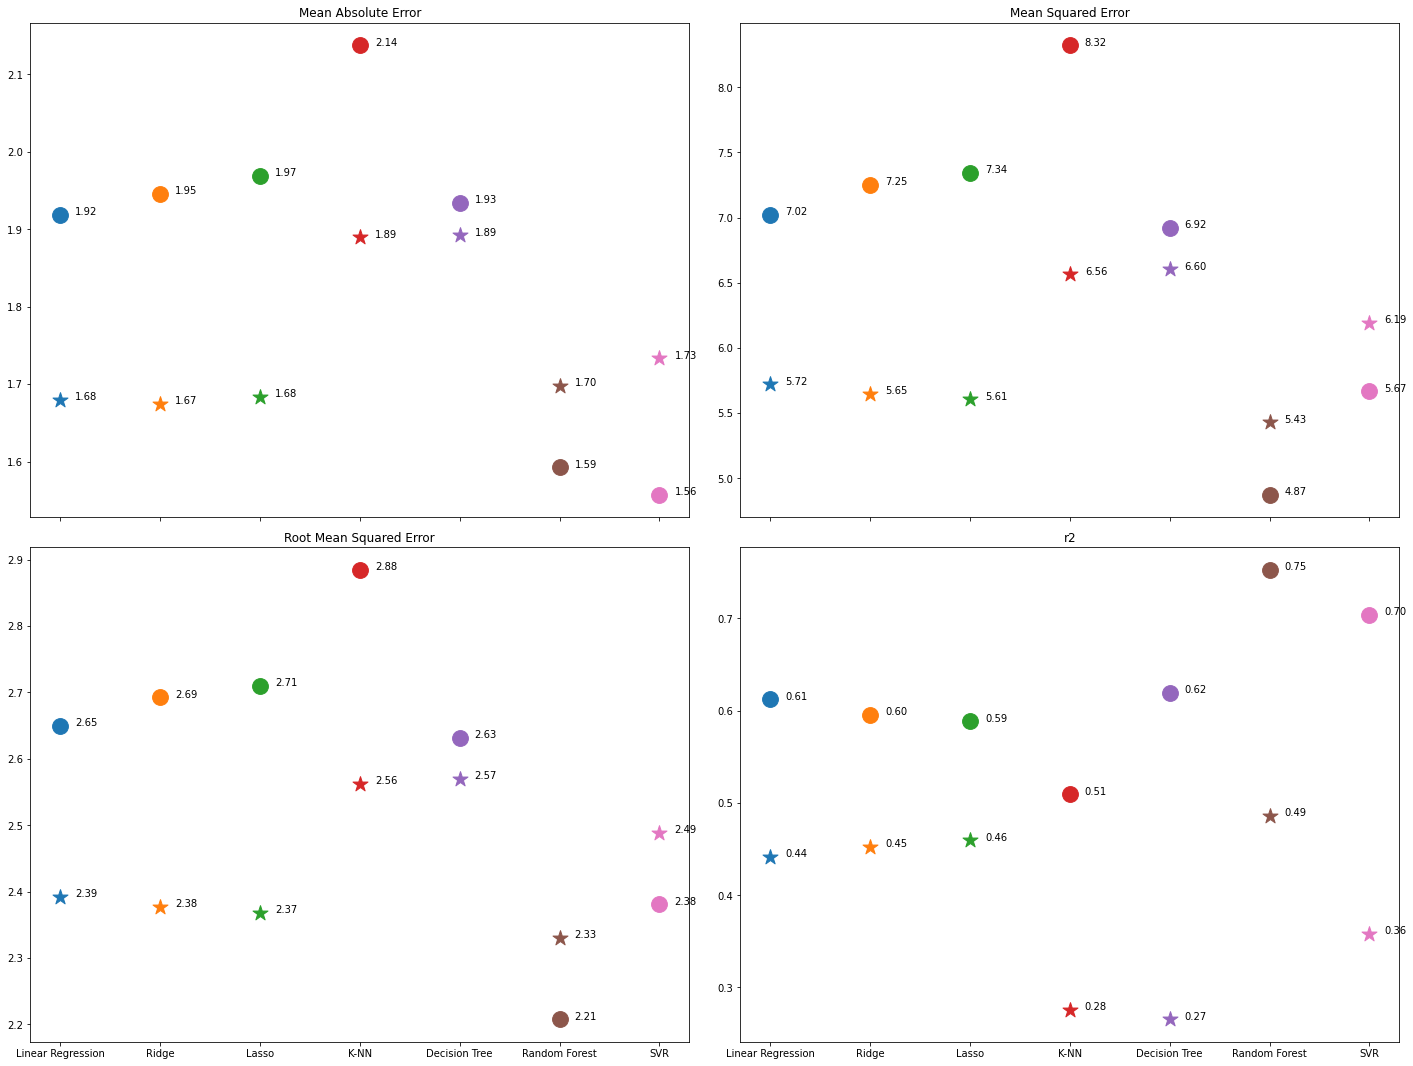

In [33]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex =True, figsize = (20,15))
fig.tight_layout(pad=2)

for ax, train_metric, test_metric, metric in zip(axes.flat, train_metrics, test_metrics, name_metrics):
    
    for d, i, color, model in zip(dicts, range(len(dicts)), tableu_colors, models):
        
        #print('Model: {} - Metric: {} - Value: {:.2f}\n'.format(model, metric, d[train_metric]))
        
        ax.scatter(x = i, y = d[train_metric], marker = 'o', color = color, s = 250)
        ax.annotate(str('{:.2f}'.format(d[train_metric])),( i + 0.15, d[train_metric]))
        
        ax.scatter(x = i, y = d[test_metric], marker = '*', color = color, s = 250)
        ax.annotate(str('{:.2f}'.format(d[test_metric])),( i + 0.15, d[test_metric]))
        
        ax.set_title(metric)
        
plt.xticks(range(len(dicts)),models)

plt.show()


## 5

## Features Importance Evaluation

To improve the obtained results the importance of the features in the prediction could be investigated. This part is done separately for SVR in notebook 3 and for RF in notebook 4.